# Convolutional Neural Network

Student number:2053460

The first part of the code is in the other inpyb file.

Since I have the all of the part like data-visualization, dummy regressor, this part of code will only consist of CNN and related parameters. This dataset is also preprocessed like the one in other document with some addition, TAT is not dropped here

# Initialization

In [179]:
from google.colab import drive                    # Moutning the drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing essential libraries

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

seed =42
batch_size =20
epochs = 6

In [181]:
dataset = pd.read_csv("/content/gdrive/MyDrive/Intro_to_ai_assesment/coursework1.csv")

dataset.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,119.890000


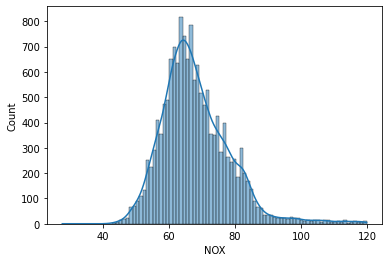

In [214]:
sns.histplot(x = dataset["NOX"], kde = True, data = dataset)
plt.show()

I have not decided to drop TAT because it is cnn and it is data hungry beast so last slice also matters and it is good in generalization

In [182]:
features = ['AT', 'AP', 'AH', 'TIT','AFDP','GTEP', 'TEY', 'CDP', 'AFDP','TAT']

from sklearn.model_selection import train_test_split
X = dataset[features]
Y = dataset.iloc[ : , -1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = seed, test_size = 0.33)                  # Train test split
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)     #Print the size of the dataset

(10076, 10) (4963, 10) (10076,) (4963,)


Here we do Normalization to make the life of cnn easier, and this is to make it more generalize

In [183]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(x_train))

print(normalizer.mean.numpy())

[  17.802113 1013.2628     79.030464 1083.9304      4.200899   25.450167
  134.28674    12.110354    4.200899  545.36505 ]


# Actual Model (Don't run this entire section if u don't want to see cnn withot hyperparameters)

This is the model before we selected hyperparameters so that i can compare how well the parameter workered initially.

## Creation

In [184]:

def original_model(normalizer):
  model = keras.Sequential([
      normalizer,
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(256, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001), metrics=['mse','mae'])
  return model

In [185]:
model = build_and_compile_model(normalizer)

model.summary()

Model: "sequential_242"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_4 (Normalizati (None, 10)                21        
_________________________________________________________________
dense_1191 (Dense)           (None, 256)               2816      
_________________________________________________________________
dense_1192 (Dense)           (None, 256)               65792     
_________________________________________________________________
dense_1193 (Dense)           (None, 256)               65792     
_________________________________________________________________
dense_1194 (Dense)           (None, 1)                 257       
Total params: 134,678
Trainable params: 134,657
Non-trainable params: 21
_________________________________________________________________


## Initiate training

In [186]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2, epochs=20)



Epoch 1/20
252/252 [==============================] - 1s 4ms/step - loss: 26.3590 - mse: 1345.6560 - mae: 26.3590 - val_loss: 4.2719 - val_mse: 40.5324 - val_mae: 4.2719
Epoch 2/20
252/252 [==============================] - 1s 3ms/step - loss: 4.0828 - mse: 33.7707 - mae: 4.0828 - val_loss: 3.7475 - val_mse: 31.1278 - val_mae: 3.7475
Epoch 3/20
252/252 [==============================] - 1s 3ms/step - loss: 3.6184 - mse: 28.4801 - mae: 3.6184 - val_loss: 3.4441 - val_mse: 27.6988 - val_mae: 3.4441
Epoch 4/20
252/252 [==============================] - 1s 3ms/step - loss: 3.2521 - mse: 22.6412 - mae: 3.2521 - val_loss: 3.1825 - val_mse: 22.9722 - val_mae: 3.1825
Epoch 5/20
252/252 [==============================] - 1s 3ms/step - loss: 3.1578 - mse: 21.2366 - mae: 3.1578 - val_loss: 3.2851 - val_mse: 22.6502 - val_mae: 3.2851
Epoch 6/20
252/252 [==============================] - 1s 3ms/step - loss: 3.0787 - mse: 20.9075 - mae: 3.0787 - val_loss: 2.9455 - val_mse: 20.6027 - val_mae: 2.9455


## Plotting results

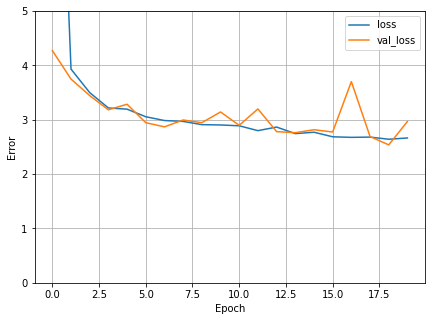

In [187]:
def plot_loss(history):
  plt.figure(figsize = (7,5))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 5])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

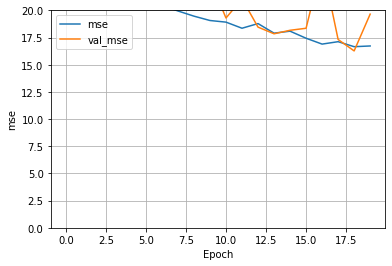

In [188]:
def plot_loss(history):
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['val_mse'], label='val_mse')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('mse')
  plt.legend()
  plt.grid(True)

plot_loss(history)

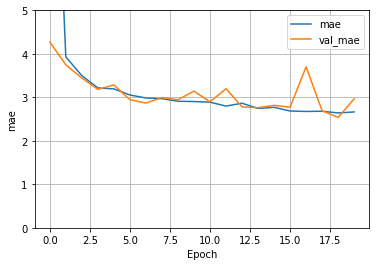

In [189]:
def plot_loss(history):
  plt.plot(history.history['mae'], label='mae')
  plt.plot(history.history['val_mae'], label='val_mae')
  plt.ylim([0, 5])
  plt.xlabel('Epoch')
  plt.ylabel('mae')
  plt.legend()
  plt.grid(True)

plot_loss(history)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


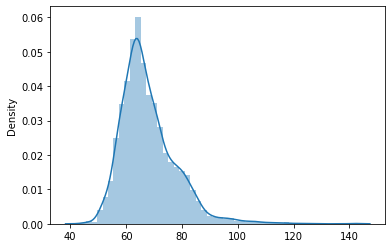

In [190]:
sns.distplot(prediction)

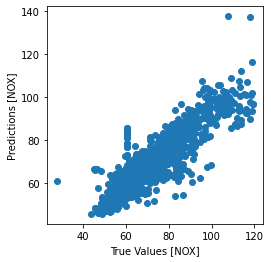

In [191]:
prediction = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, prediction)
plt.xlabel('True Values [NOX]')
plt.ylabel('Predictions [NOX]')
lims = [0, 150]

In [192]:
error = np.mean(abs(prediction- y_test)/y_test)

accuracy = 1 - error
accuracy_percent = 100*accuracy

print("error % is:",error*100)
print("accuracy:",accuracy_percent)

error % is: 4.3147776748074325
accuracy: 95.68522232519257


# Hyperparameter and cross validation 

## Redefining function for model creation

this function defines the whole structure of the model which is similar as in last section 

In [193]:
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.wrappers.scikit_learn import KerasRegressor

def create_new_model( nn1=256,nn2=256,nn3=256,lr=0.01, decay=0., l1=0.01, l2=0.01, act = 'relu', batch_size = 20, epochs = 6):
    '''This is a model generating function so that we can search over neural net 
    parameters and architecture'''
    
    opt = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999,  decay=decay)
    reg = keras.regularizers.l1_l2(l1=l1, l2=l2)                                                 
    model = keras.Sequential([
      normalizer,
      layers.Dense(nn1, activation=act, kernel_regularizer=reg),
      layers.Dense(nn2, activation=act, kernel_regularizer=reg),
      layers.Dense(nn3, activation=act, kernel_regularizer=reg),
      layers.Dense(1)
  ])
    model.compile(loss='MSE',
                optimizer=opt, metrics=['mean_squared_error'])
    
    return model

Creating Keras regressor with this model

In [194]:
model_h = KerasRegressor(build_fn=create_new_model, epochs=6, batch_size=batch_size, verbose=1)

## Use Randomized CV

Creating param grid

In [195]:
# learning algorithm parameters
lr=[1e-2, 1e-3, 1e-4, 1e-5]
decay=[1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,0]

# activation
activation=['relu','sigmoid','linear','selu','tanh']

batch_size=[20,32,64,10]

epoch = [4,6,10,12,16,18,20,50,100]

nn1=[32,56,128,256]
nn2=[32,56,128,256]
nn3=[32,56,128,256]

l1 = [0, 0.01, 0.003, 0.001, 0.0001]
l2 = [0, 0.01, 0.003, 0.001, 0.0001]

# dictionary summary
param_grid_2 = dict(
                    act=activation, l1=l1, l2=l2, lr=lr, decay=decay, nn1=nn1, nn2=nn2, nn3=nn3, batch_size=batch_size
                 )
print(param_grid_2)

{'act': ['relu', 'sigmoid', 'linear', 'selu', 'tanh'], 'l1': [0, 0.01, 0.003, 0.001, 0.0001], 'l2': [0, 0.01, 0.003, 0.001, 0.0001], 'lr': [0.01, 0.001, 0.0001, 1e-05], 'decay': [0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 0], 'nn1': [32, 56, 128, 256], 'nn2': [32, 56, 128, 256], 'nn3': [32, 56, 128, 256], 'batch_size': [20, 32, 64, 10]}


Doing randomized cv on CNN

In [209]:
from sklearn.model_selection import RandomizedSearchCV, KFold
grid = RandomizedSearchCV(estimator=model_h, cv=KFold(3), param_distributions=param_grid_2, 
                          verbose=20,  n_iter=100, n_jobs=1, random_state = seed)

In [210]:
# Note this will take a lot of time to run
regresor_random = grid.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] nn3=128, nn2=56, nn1=128, lr=0.001, l2=0.01, l1=0, decay=1e-09, batch_size=64, act=relu 
Epoch 1/6


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


105/105 [==============================] - 1s 2ms/step - loss: 3386.9668 - mean_squared_error: 3385.1307
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 132.3430 - mean_squared_error: 130.2750
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 73.0449 - mean_squared_error: 71.0084
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 49.7946 - mean_squared_error: 47.7577
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 41.8991 - mean_squared_error: 39.8494
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 31.0002 - mean_squared_error: 28.9290
[CV]  nn3=128, nn2=56, nn1=128, lr=0.001, l2=0.01, l1=0, decay=1e-09, batch_size=64, act=relu, score=-31.000, total=   2.1s
[CV] nn3=128, nn2=56, nn1=128, lr=0.001, l2=0.01, l1=0, decay=1e-09, batch_size=64, act=relu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 3338.5123 - mean_squared_error: 3336.6331
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 132.2010 - mean_squared_error: 130.0469
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 71.8212 - mean_squared_error: 69.6941
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 51.4921 - mean_squared_error: 49.3767
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 43.4859 - mean_squared_error: 41.3795
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 31.5378 - mean_squared_error: 29.4460
[CV]  nn3=128, nn2=56, nn1=128, lr=0.001, l2=0.01, l1=0, decay=1e-09, batch_size=64, act=relu, score=-31.538, total=   2.0s
[CV] nn3=128, nn2=56, nn1=128, lr=0.001, l2=0.01, l1=0, decay=1e-09, batch_size=64, act=relu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 3411.0215 - mean_squared_error: 3409.1996
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 125.0175 - mean_squared_error: 122.9259
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 60.5215 - mean_squared_error: 58.4302
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 46.8472 - mean_squared_error: 44.7528
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 36.5912 - mean_squared_error: 34.4999
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 34.3436 - mean_squared_error: 32.2678
[CV]  nn3=128, nn2=56, nn1=128, lr=0.001, l2=0.01, l1=0, decay=1e-09, batch_size=64, act=relu, score=-34.344, total=   2.0s
[CV] nn3=256, nn2=32, nn1=256, lr=0.0001, l2=0.01, l1=0.0001, decay=0, batch_size=64, act=selu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.1s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 4664.5670 - mean_squared_error: 4663.0967
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 4018.9137 - mean_squared_error: 4017.4092
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 2170.3386 - mean_squared_error: 2168.7175
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 584.7070 - mean_squared_error: 582.9379
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 115.8091 - mean_squared_error: 113.9441
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 62.4250 - mean_squared_error: 60.5219
[CV]  nn3=256, nn2=32, nn1=256, lr=0.0001, l2=0.01, l1=0.0001, decay=0, batch_size=64, act=selu, score=-62.425, total=   2.3s
[CV] nn3=256, nn2=32, nn1=256, lr=0.0001, l2=0.01, l1=0.0001, decay=0, batch_size=64, act=selu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.5s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 4677.1308 - mean_squared_error: 4675.6797
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 3958.8164 - mean_squared_error: 3957.3307
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 2085.9246 - mean_squared_error: 2084.3278
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 594.9037 - mean_squared_error: 593.1690
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 121.3658 - mean_squared_error: 119.5392
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 58.5668 - mean_squared_error: 56.7018
[CV]  nn3=256, nn2=32, nn1=256, lr=0.0001, l2=0.01, l1=0.0001, decay=0, batch_size=64, act=selu, score=-58.567, total=   2.8s
[CV] nn3=256, nn2=32, nn1=256, lr=0.0001, l2=0.01, l1=0.0001, decay=0, batch_size=64, act=selu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.2s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 4694.3702 - mean_squared_error: 4692.8968
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 4054.6608 - mean_squared_error: 4053.1517
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 2231.2642 - mean_squared_error: 2229.6396
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 606.6244 - mean_squared_error: 604.8501
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 102.4636 - mean_squared_error: 100.5949
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 59.3159 - mean_squared_error: 57.4173
[CV]  nn3=256, nn2=32, nn1=256, lr=0.0001, l2=0.01, l1=0.0001, decay=0, batch_size=64, act=selu, score=-59.316, total=   2.3s
[CV] nn3=32, nn2=256, nn1=56, lr=0.001, l2=0, l1=0.001, decay=0, batch_size=64, act=relu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.6s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 3379.3483 - mean_squared_error: 3377.6519
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 144.2066 - mean_squared_error: 142.3911
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 77.8715 - mean_squared_error: 76.0643
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 56.6314 - mean_squared_error: 54.8313
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 40.9581 - mean_squared_error: 39.1616
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 32.3976 - mean_squared_error: 30.6138
[CV]  nn3=32, nn2=256, nn1=56, lr=0.001, l2=0, l1=0.001, decay=0, batch_size=64, act=relu, score=-32.398, total=   2.1s
[CV] nn3=32, nn2=256, nn1=56, lr=0.001, l2=0, l1=0.001, decay=0, batch_size=64, act=relu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   15.7s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 3459.5290 - mean_squared_error: 3457.8356
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 168.8530 - mean_squared_error: 167.0139
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 80.6519 - mean_squared_error: 78.8192
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 57.1136 - mean_squared_error: 55.2831
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 45.0411 - mean_squared_error: 43.2137
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 32.7010 - mean_squared_error: 30.8789
[CV]  nn3=32, nn2=256, nn1=56, lr=0.001, l2=0, l1=0.001, decay=0, batch_size=64, act=relu, score=-32.701, total=   2.1s
[CV] nn3=32, nn2=256, nn1=56, lr=0.001, l2=0, l1=0.001, decay=0, batch_size=64, act=relu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.8s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 3099.3009 - mean_squared_error: 3097.5772
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 167.2185 - mean_squared_error: 165.4173
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 84.9918 - mean_squared_error: 83.2075
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 51.0873 - mean_squared_error: 49.3027
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 40.2393 - mean_squared_error: 38.4555
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 34.3164 - mean_squared_error: 32.5447
[CV]  nn3=32, nn2=256, nn1=56, lr=0.001, l2=0, l1=0.001, decay=0, batch_size=64, act=relu, score=-34.316, total=   2.1s
[CV] nn3=128, nn2=256, nn1=32, lr=0.01, l2=0.0001, l1=0, decay=1e-05, batch_size=20, act=linear 
Epoch 1/6


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.9s remaining:    0.0s


336/336 [==============================] - 1s 2ms/step - loss: 772.7441 - mean_squared_error: 772.7117
Epoch 2/6
336/336 [==============================] - 1s 2ms/step - loss: 65.6550 - mean_squared_error: 65.6230
Epoch 3/6
336/336 [==============================] - 1s 2ms/step - loss: 64.2076 - mean_squared_error: 64.1752
Epoch 4/6
336/336 [==============================] - 1s 2ms/step - loss: 57.5352 - mean_squared_error: 57.5025
Epoch 5/6
336/336 [==============================] - 1s 2ms/step - loss: 58.3127 - mean_squared_error: 58.2801
Epoch 6/6
168/168 [==============================] - 0s 1ms/step - loss: 55.7074 - mean_squared_error: 55.6746
[CV]  nn3=128, nn2=256, nn1=32, lr=0.01, l2=0.0001, l1=0, decay=1e-05, batch_size=20, act=linear, score=-55.707, total=   4.5s
[CV] nn3=128, nn2=256, nn1=32, lr=0.01, l2=0.0001, l1=0, decay=1e-05, batch_size=20, act=linear 
Epoch 1/6


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   24.3s remaining:    0.0s


336/336 [==============================] - 1s 2ms/step - loss: 802.1026 - mean_squared_error: 802.0701
Epoch 2/6
336/336 [==============================] - 1s 2ms/step - loss: 68.2921 - mean_squared_error: 68.2599
Epoch 3/6
336/336 [==============================] - 1s 2ms/step - loss: 59.6264 - mean_squared_error: 59.5934
Epoch 4/6
336/336 [==============================] - 1s 2ms/step - loss: 61.9070 - mean_squared_error: 61.8745
Epoch 5/6
336/336 [==============================] - 1s 2ms/step - loss: 60.0869 - mean_squared_error: 60.0539
Epoch 6/6
168/168 [==============================] - 0s 1ms/step - loss: 57.5912 - mean_squared_error: 57.5585
[CV]  nn3=128, nn2=256, nn1=32, lr=0.01, l2=0.0001, l1=0, decay=1e-05, batch_size=20, act=linear, score=-57.591, total=   4.4s
[CV] nn3=128, nn2=256, nn1=32, lr=0.01, l2=0.0001, l1=0, decay=1e-05, batch_size=20, act=linear 
Epoch 1/6


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   28.7s remaining:    0.0s


336/336 [==============================] - 1s 2ms/step - loss: 784.3906 - mean_squared_error: 784.3587
Epoch 2/6
336/336 [==============================] - 1s 2ms/step - loss: 70.3769 - mean_squared_error: 70.3452
Epoch 3/6
336/336 [==============================] - 1s 2ms/step - loss: 61.5133 - mean_squared_error: 61.4816
Epoch 4/6
336/336 [==============================] - 1s 2ms/step - loss: 60.4003 - mean_squared_error: 60.3689
Epoch 5/6
336/336 [==============================] - 1s 2ms/step - loss: 62.2069 - mean_squared_error: 62.1749
Epoch 6/6
168/168 [==============================] - 0s 1ms/step - loss: 62.9537 - mean_squared_error: 62.9215
[CV]  nn3=128, nn2=256, nn1=32, lr=0.01, l2=0.0001, l1=0, decay=1e-05, batch_size=20, act=linear, score=-62.954, total=   4.4s
[CV] nn3=128, nn2=128, nn1=128, lr=0.001, l2=0.003, l1=0.003, decay=1e-09, batch_size=32, act=sigmoid 
Epoch 1/6


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   33.1s remaining:    0.0s


210/210 [==============================] - 1s 2ms/step - loss: 3609.3374 - mean_squared_error: 3600.3056
Epoch 2/6
210/210 [==============================] - 0s 2ms/step - loss: 1862.4985 - mean_squared_error: 1853.2580
Epoch 3/6
210/210 [==============================] - 0s 2ms/step - loss: 948.1455 - mean_squared_error: 939.3718
Epoch 4/6
210/210 [==============================] - 0s 2ms/step - loss: 437.6382 - mean_squared_error: 429.5001
Epoch 5/6
210/210 [==============================] - 0s 2ms/step - loss: 228.0516 - mean_squared_error: 220.6174
Epoch 6/6
105/105 [==============================] - 0s 1ms/step - loss: 125.8403 - mean_squared_error: 119.7254
[CV]  nn3=128, nn2=128, nn1=128, lr=0.001, l2=0.003, l1=0.003, decay=1e-09, batch_size=32, act=sigmoid, score=-125.840, total=   3.5s
[CV] nn3=128, nn2=128, nn1=128, lr=0.001, l2=0.003, l1=0.003, decay=1e-09, batch_size=32, act=sigmoid 
Epoch 1/6


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   36.5s remaining:    0.0s


210/210 [==============================] - 1s 2ms/step - loss: 3665.2389 - mean_squared_error: 3656.1094
Epoch 2/6
210/210 [==============================] - 0s 2ms/step - loss: 1895.9418 - mean_squared_error: 1886.6043
Epoch 3/6
210/210 [==============================] - 0s 2ms/step - loss: 963.9944 - mean_squared_error: 955.1050
Epoch 4/6
210/210 [==============================] - 0s 2ms/step - loss: 469.4240 - mean_squared_error: 461.1509
Epoch 5/6
210/210 [==============================] - 0s 2ms/step - loss: 243.8873 - mean_squared_error: 236.3084
Epoch 6/6
105/105 [==============================] - 0s 1ms/step - loss: 122.8397 - mean_squared_error: 116.5277
[CV]  nn3=128, nn2=128, nn1=128, lr=0.001, l2=0.003, l1=0.003, decay=1e-09, batch_size=32, act=sigmoid, score=-122.840, total=   3.4s
[CV] nn3=128, nn2=128, nn1=128, lr=0.001, l2=0.003, l1=0.003, decay=1e-09, batch_size=32, act=sigmoid 
Epoch 1/6


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   39.9s remaining:    0.0s


210/210 [==============================] - 1s 2ms/step - loss: 3666.5690 - mean_squared_error: 3657.4722
Epoch 2/6
210/210 [==============================] - 0s 2ms/step - loss: 1838.9380 - mean_squared_error: 1829.6545
Epoch 3/6
210/210 [==============================] - 0s 2ms/step - loss: 900.2972 - mean_squared_error: 891.5597
Epoch 4/6
210/210 [==============================] - 0s 2ms/step - loss: 443.7141 - mean_squared_error: 435.7054
Epoch 5/6
210/210 [==============================] - 0s 2ms/step - loss: 207.4444 - mean_squared_error: 200.2043
Epoch 6/6
105/105 [==============================] - 0s 1ms/step - loss: 121.3245 - mean_squared_error: 115.4420
[CV]  nn3=128, nn2=128, nn1=128, lr=0.001, l2=0.003, l1=0.003, decay=1e-09, batch_size=32, act=sigmoid, score=-121.324, total=   3.4s
[CV] nn3=256, nn2=56, nn1=32, lr=0.001, l2=0.01, l1=0.001, decay=1e-06, batch_size=64, act=selu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   43.4s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 3614.0415 - mean_squared_error: 3611.1347
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 61.5008 - mean_squared_error: 57.8379
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 36.9311 - mean_squared_error: 33.2357
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 30.4932 - mean_squared_error: 26.7832
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 27.3787 - mean_squared_error: 23.6767
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 24.9074 - mean_squared_error: 21.2398
[CV]  nn3=256, nn2=56, nn1=32, lr=0.001, l2=0.01, l1=0.001, decay=1e-06, batch_size=64, act=selu, score=-24.907, total=   2.7s
[CV] nn3=256, nn2=56, nn1=32, lr=0.001, l2=0.01, l1=0.001, decay=1e-06, batch_size=64, act=selu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   46.1s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 3612.3134 - mean_squared_error: 3609.4211
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 58.7882 - mean_squared_error: 55.1399
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 36.9423 - mean_squared_error: 33.2588
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 30.5859 - mean_squared_error: 26.8930
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 28.1150 - mean_squared_error: 24.4281
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 27.4576 - mean_squared_error: 23.8069
[CV]  nn3=256, nn2=56, nn1=32, lr=0.001, l2=0.01, l1=0.001, decay=1e-06, batch_size=64, act=selu, score=-27.458, total=   2.2s
[CV] nn3=256, nn2=56, nn1=32, lr=0.001, l2=0.01, l1=0.001, decay=1e-06, batch_size=64, act=selu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   48.3s remaining:    0.0s


105/105 [==============================] - 1s 2ms/step - loss: 3693.1790 - mean_squared_error: 3690.2309
Epoch 2/6
105/105 [==============================] - 0s 2ms/step - loss: 63.4512 - mean_squared_error: 59.6890
Epoch 3/6
105/105 [==============================] - 0s 2ms/step - loss: 32.9802 - mean_squared_error: 29.1510
Epoch 4/6
105/105 [==============================] - 0s 2ms/step - loss: 29.9817 - mean_squared_error: 26.1532
Epoch 5/6
105/105 [==============================] - 0s 2ms/step - loss: 26.9662 - mean_squared_error: 23.1559
Epoch 6/6
53/53 [==============================] - 0s 1ms/step - loss: 27.1973 - mean_squared_error: 23.4282
[CV]  nn3=256, nn2=56, nn1=32, lr=0.001, l2=0.01, l1=0.001, decay=1e-06, batch_size=64, act=selu, score=-27.197, total=   2.3s
[CV] nn3=32, nn2=256, nn1=256, lr=0.0001, l2=0, l1=0.01, decay=1e-07, batch_size=64, act=relu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   50.6s remaining:    0.0s


105/105 [==============================] - 1s 4ms/step - loss: 4566.3793 - mean_squared_error: 4523.0696
Epoch 2/6
105/105 [==============================] - 0s 4ms/step - loss: 2955.6087 - mean_squared_error: 2912.2368
Epoch 3/6
105/105 [==============================] - 0s 4ms/step - loss: 869.6144 - mean_squared_error: 825.5717
Epoch 4/6
105/105 [==============================] - 0s 4ms/step - loss: 430.2142 - mean_squared_error: 386.2917
Epoch 5/6
105/105 [==============================] - 0s 4ms/step - loss: 278.3703 - mean_squared_error: 234.8226
Epoch 6/6
53/53 [==============================] - 0s 2ms/step - loss: 193.2844 - mean_squared_error: 150.5588
[CV]  nn3=32, nn2=256, nn1=256, lr=0.0001, l2=0, l1=0.01, decay=1e-07, batch_size=64, act=relu, score=-193.284, total=   3.4s
[CV] nn3=32, nn2=256, nn1=256, lr=0.0001, l2=0, l1=0.01, decay=1e-07, batch_size=64, act=relu 
Epoch 1/6


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   53.9s remaining:    0.0s


105/105 [==============================] - 1s 4ms/step - loss: 4670.3769 - mean_squared_error: 4627.1750
Epoch 2/6
105/105 [==============================] - 0s 4ms/step - loss: 3526.4830 - mean_squared_error: 3483.4586
Epoch 3/6
105/105 [==============================] - 0s 4ms/step - loss: 1346.5096 - mean_squared_error: 1302.6738
Epoch 4/6
105/105 [==============================] - 0s 4ms/step - loss: 568.0353 - mean_squared_error: 523.9358
Epoch 5/6
105/105 [==============================] - 0s 4ms/step - loss: 343.6324 - mean_squared_error: 299.8468
Epoch 6/6
53/53 [==============================] - 0s 2ms/step - loss: 202.2046 - mean_squared_error: 159.1540
[CV]  nn3=32, nn2=256, nn1=256, lr=0.0001, l2=0, l1=0.01, decay=1e-07, batch_size=64, act=relu, score=-202.205, total=   3.3s
[CV] nn3=32, nn2=256, nn1=256, lr=0.0001, l2=0, l1=0.01, decay=1e-07, batch_size=64, act=relu 
Epoch 1/6
105/105 [==============================] - 1s 4ms/step - loss: 4712.7950 - mean_squared_error: 46

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 32.7min finished


1008/1008 [==============================] - 2s 2ms/step - loss: 956.2938 - mean_squared_error: 955.5294
Epoch 2/6
1008/1008 [==============================] - 2s 2ms/step - loss: 73.5597 - mean_squared_error: 72.6220
Epoch 3/6
1008/1008 [==============================] - 2s 2ms/step - loss: 24.6175 - mean_squared_error: 23.2101
Epoch 4/6
1008/1008 [==============================] - 2s 2ms/step - loss: 22.4444 - mean_squared_error: 20.9477
Epoch 5/6
1008/1008 [==============================] - 2s 2ms/step - loss: 19.9569 - mean_squared_error: 18.3848
Epoch 6/6
1008/1008 [==============================] - 2s 2ms/step - loss: 18.4909 - mean_squared_error: 16.8836


## Check results of new and improved model

In [198]:
regresor_random.best_params_

{'act': 'relu',
 'batch_size': 32,
 'decay': 1e-07,
 'l1': 0,
 'l2': 0.001,
 'lr': 0.01,
 'nn1': 256,
 'nn2': 56,
 'nn3': 32}

In [202]:
random_regressor = regresor_random.best_estimator_
random_predict = random_regressor.predict(x_test)
random_error_n = abs(random_predict - y_test)
random_accuracy_n = 100-100 * np.mean(random_error_n / y_test) 

print("The Model Performance is : ")
print("Average Error : ",np.mean(random_error_n))
print("Accuracy : ",random_accuracy_n)

156/156 [==============================] - 0s 844us/step
The Model Performance is : 
Average Error :  3.757398434044258
Accuracy :  94.37792762170261


In [205]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

mse_n = np.square(np.subtract(y_test,random_predict)).mean()
print("mean square error :",mse_n)
print("r2 score for this model is :",r2_score(y_test,random_predict))

mean square error : 25.349894029954328
r2 score for this model is : 0.7733788338738108


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


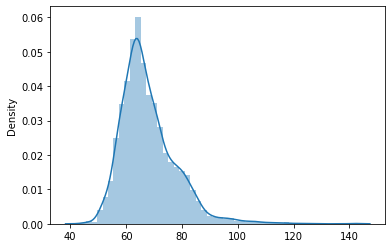

In [207]:
sns.distplot(grid_predict)
plt.show()

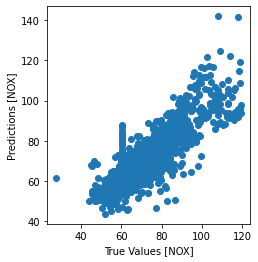

In [212]:
prediction = grid_predict

a = plt.axes(aspect='equal')
plt.scatter(y_test, prediction)
plt.xlabel('True Values [NOX]')
plt.ylabel('Predictions [NOX]')
lims = [0, 200]